In [9]:
import sys
sys.path.append('../src')

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from structure_learning.data import SyntheticDataset, Data
from structure_learning.distributions import Distribution
from structure_learning.experiments import Experiment
from structure_learning.evaluation.metrics import RHat
from structure_learning.samplers import StructureMCMC
from structure_learning.inference import CausalEffects
# for reproducibility
np.random.seed(1000)

### Generate data

In [11]:
# setup synthetic data
num_nodes = 5
node_labels = [chr(ord('a') + i) for i in range(num_nodes)]
num_obs = 200
degree = 2

synthetic_data = SyntheticDataset(num_nodes=num_nodes, num_obs=num_obs, node_labels=node_labels, degree=degree)

00000 00000 00000 11101 00100


In [12]:
synthetic_data.data

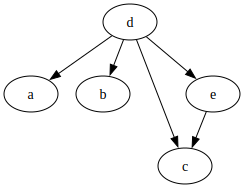

In [13]:
synthetic_data.graph.plot()

### Run MCMC

In [14]:

M = StructureMCMC(data=synthetic_data.data, score_object='bge', max_iter=100, pc_init=True, result_type='distribution')
results, acceptance = M.run()

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'a': 'N', 'b': 'N', 'c': 'N', 'd': 'N', 'e': 'N'}


Running PC algorithm


  0%|          | 0/5 [00:00<?, ?it/s]

### Causal Effects

In [ ]:
ce = CausalEffects(graphs=results, data=synthetic_data.data)

### BEEPS

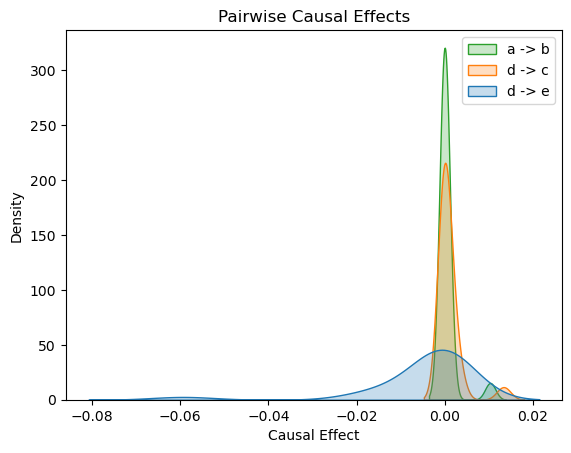

In [22]:
beeps = ce.beeps(plot=True, edges=[('a','b'),('d','c'),('d', 'e')])